In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from wrangle import load_dataset, encode_categorical_data, keep_selected_columns
from explore import split_data_and_create_baseline, calculate_point_biserial_correlation, univariate_analysis,bivariate_analysis,multivariate_analysis
from model import train_and_evaluate_models, evaluate_best_model

# Acquire & Prep

In [15]:
df =load_dataset()

Skipping, found downloaded files in "./breast-cancer-dataset" (use force=True to force download)


In [16]:
df = encode_categorical_data(df)

In [17]:
df = keep_selected_columns(df)

In [24]:
df

,diagnosis,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,1,0.14710,25.380,184.60,0.2654
1,1,0.07017,24.990,158.80,0.1860
2,1,0.12790,23.570,152.50,0.2430
3,1,0.10520,14.910,98.87,0.2575
4,1,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,1,0.13890,25.450,166.10,0.2216
565,1,0.09791,23.690,155.00,0.1628
566,1,0.05302,18.980,126.70,0.1418
567,1,0.15200,25.740,184.60,0.2650


# EDA

In [25]:
# Select features and target variable
X = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']].values
Y = df['diagnosis'].values

In [29]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test, accuracy = split_data_and_create_baseline(X, Y)


In [30]:
selected_features = ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']
target_variable = 'diagnosis'
significance_level = 0.05

# Call the function and provide the DataFrame and other arguments
correlation_results = calculate_point_biserial_correlation(df, selected_features, target_variable, significance_level)


Correlation Results:
Correlation between concave points_mean and diagnosis:
Point-Biserial Correlation Coefficient: 0.7766
P-value: 0.0000

Correlation between concave points_mean and diagnosis is statistically significant.
Correlation between radius_worst and diagnosis:
Point-Biserial Correlation Coefficient: 0.7765
P-value: 0.0000

Correlation between radius_worst and diagnosis is statistically significant.
Correlation between perimeter_worst and diagnosis:
Point-Biserial Correlation Coefficient: 0.7829
P-value: 0.0000

Correlation between perimeter_worst and diagnosis is statistically significant.
Correlation between concave points_worst and diagnosis:
Point-Biserial Correlation Coefficient: 0.7936
P-value: 0.0000

Correlation between concave points_worst and diagnosis is statistically significant.


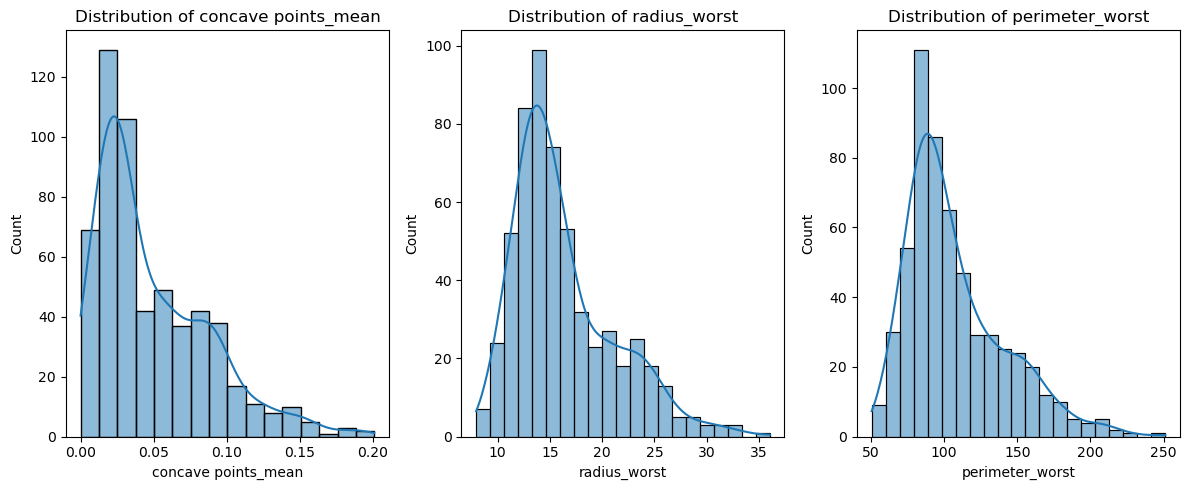

In [36]:
univariate_analysis(df)

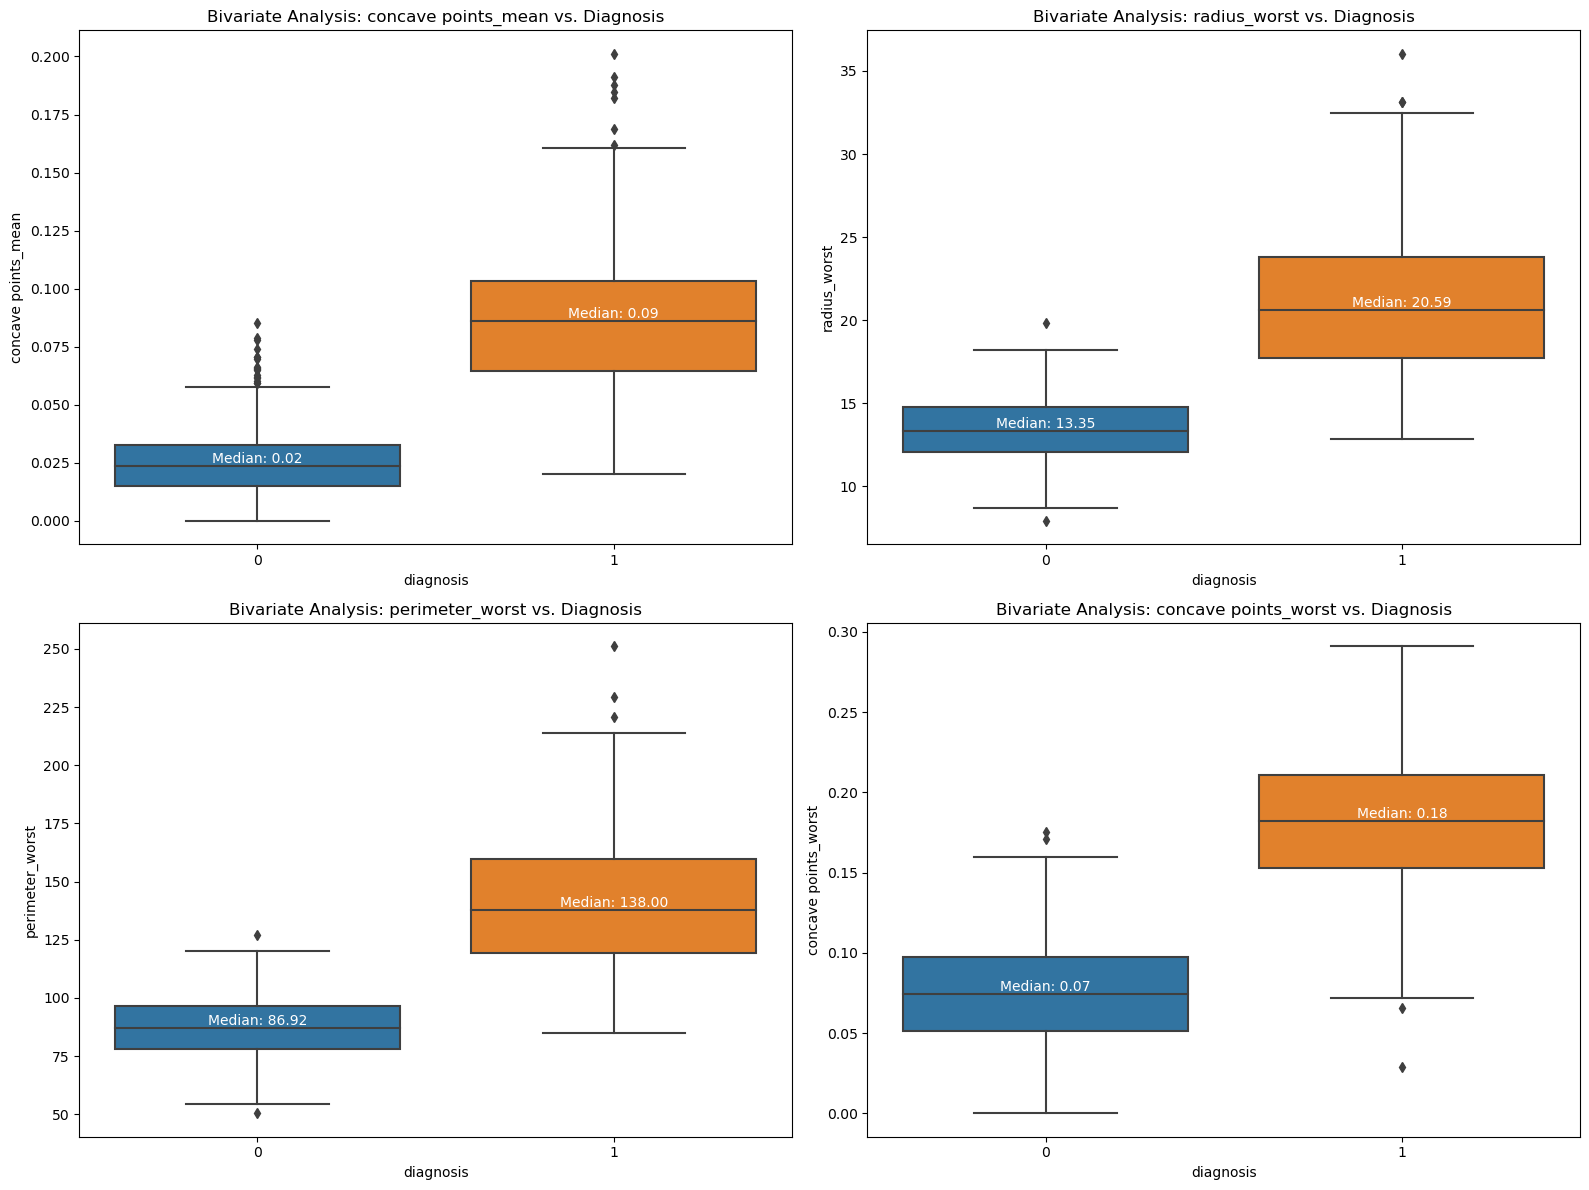

In [34]:
bivariate_analysis(df)

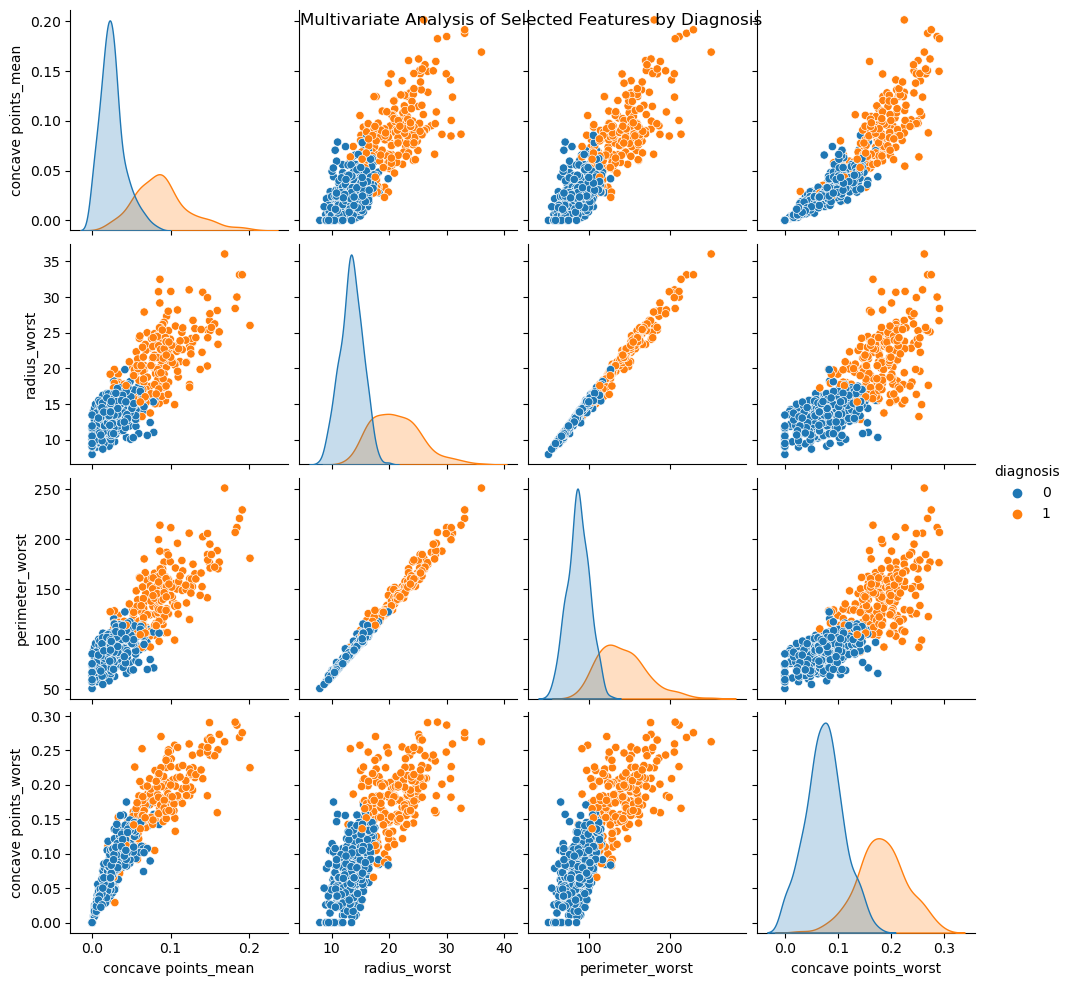

In [35]:
multivariate_analysis(df)

# Model

In [45]:
# Train and evaluate models on the validation set
trained_models = train_and_evaluate_models(X_train, Y_train, X_validation, Y_validation)


Model [0] Train Accuracy: 0.94
Model [1] Train Accuracy: 1.00
Model [2] Train Accuracy: 0.99
Model [3] Train Accuracy: 0.94
Model [4] Train Accuracy: 0.98


<function model.evaluate_best_model(models, X_test, Y_test)>